<h1>Smart Hotel Manager</h1>
<li>By Royal Flush</li>
<li>Group member: Jiaqi Zhu, Yizhe Li, Catherine Wu, Yunfeng Wang</li>
<li>Dataset: <a href="https://www.kaggle.com/jessemostipak/hotel-booking-demand" >https://www.kaggle.com/jessemostipak/hotel-booking-demand</a></li>

In [1]:
#Packages used in the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import pylab
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

<h1>Data Import and Basic Info</h1>

In [3]:
#import the csv data and print out the brief info
df = pd.read_csv("hotel_bookings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
#calculate the basic stats for numerical columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
#display all the columns in the dataframe
pd.set_option('display.max_columns', None)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


<h1> Data Cleaning</h1>
    <li>Replace the feature value label</li>
    <li>Remove redundant columns and rows</li>

In [6]:
#Make a copy of the dataframe before manipulate
dfclean = df.copy()

# delete rows with average daily rate <= 0 or total stay nights = 0 (approximately 2000 rows)
stay = dfclean[~((df.stays_in_weekend_nights == 0) & (df.stays_in_week_nights == 0))]
dfclean = stay[stay.adr>0]

# Create a new column indicating if the booking is booked by a company (so potentially business trip)
dfclean['company_category'] = np.where(np.isnan(dfclean['company']), 'Non-Company', 'Company')

# Create a new column indicates whether the reserved room type was changed by the hotel
dfclean['room_type_adjustment'] = np.where(dfclean.reserved_room_type == dfclean.assigned_room_type, 'No change', 'Change')

#delete the redundant columns
del dfclean['company']
del dfclean['reservation_status_date']

<h2>Let's take a look at all numerical data's distribution</h2>
    <li>There are some outliers in many variables, some are due to the difference in customer type. Group reseravtion would have lots of guests (adults, children, babies) showed by in those columns.</li>

In [7]:
df_num = dfclean[['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 
                'stays_in_weekend_nights', 'stays_in_week_nights','adults', 'children','babies', 
                'previous_cancellations','previous_bookings_not_canceled','booking_changes', 
                'days_in_waiting_list', 'adr','required_car_parking_spaces','total_of_special_requests']]

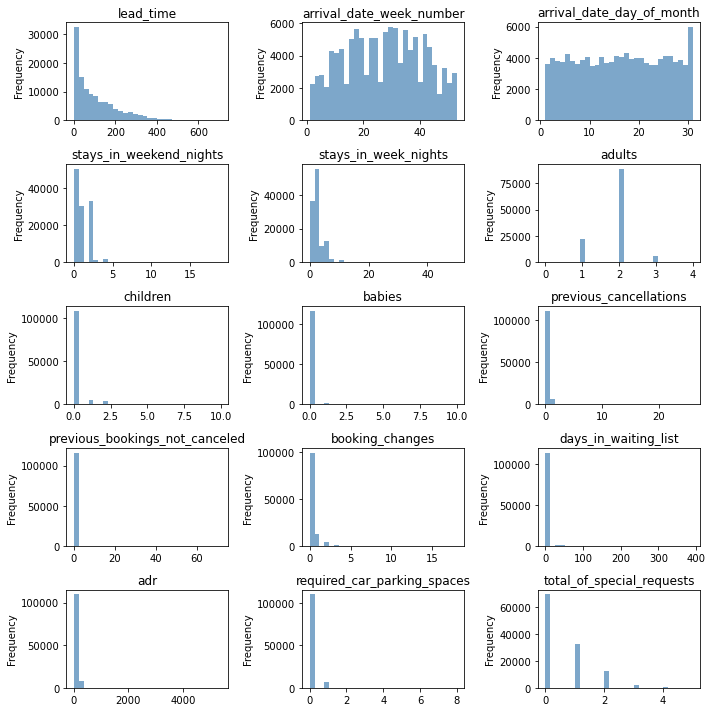

In [8]:
%matplotlib inline
ROW_NUM = 5
COL_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(10,10))
for i, col in enumerate(df_num.columns):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    dfplt = df_num[col]
    dfplt.plot.hist(ax = ax, bins =30, 
               color='steelblue', edgecolor='none', alpha = 0.7)
    ax.set_title(col)
plt.tight_layout() 

<h2>Customer Type</h2>
    <li>There are 4 total customer types: contract, group, transient, transient-party.</li>
    <li>Group reservation has the lowest cancelation rate, whereas transient customers have the highest cancelation rate of more than 40%.</li>

Text(0, 0.5, 'Cancelation Rate')

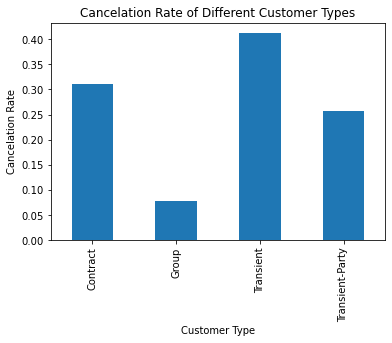

In [9]:
#group the data by customer type
customer_type = dfclean.groupby('customer_type').agg('mean')['is_canceled'].plot(kind = 'bar')
customer_type.set_title('Cancelation Rate of Different Customer Types')
customer_type.set_xlabel('Customer Type')
customer_type.set_ylabel('Cancelation Rate')

<h2>Lead Time</h2>
    <li>Lead time is how long ahead the reservation was made prior to arrvial date.</li>
    <li>The closer is reservation date and arrival date, the less likely the booking gets canceled.</li>

Text(0.5, 1.0, 'Lead time vs. cancel')

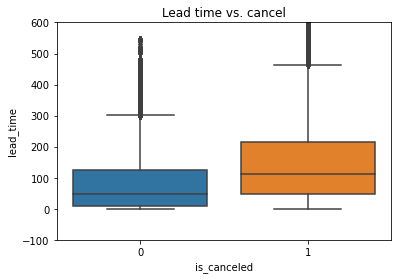

In [10]:
#use box plot to see the basic info between lead time and response variable.

ax = sns.boxplot(x = 'is_canceled', y = 'lead_time', data = dfclean)
ax.set_ylim([-100,600])
ax.set_title('Lead time vs. cancel')

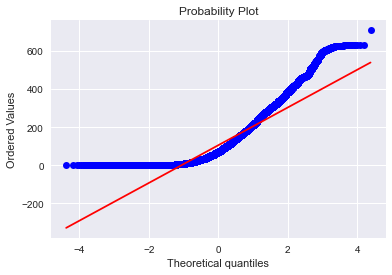

In [11]:
#use qq plot to check whether there exists the outliers
matplotlib.style.use('seaborn')
%matplotlib inline
stats.probplot(dfclean['lead_time'],dist = 'norm', plot = pylab)
pylab.show()

<h2>Deposit Type</h2>
    <li>Surprisingly, many of the canceled bookings have non-refundable deposit.</li>


Text(0, 0.5, 'Frequency')

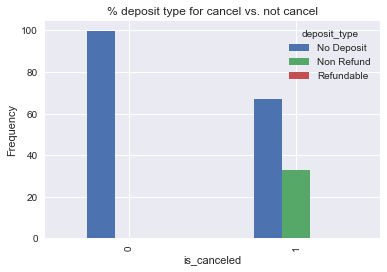

In [12]:
#use bar graph to see the difference between deposit types
deposit_type = dfclean.groupby(['is_canceled', 'deposit_type']).size()
deposit_type_pct = deposit_type.groupby(level = 0).apply(lambda x: 100 * x / float(x.sum()))
deposit_plot = deposit_type_pct.unstack().plot(kind = 'bar')
deposit_plot.set_title('% deposit type for cancel vs. not cancel')
deposit_plot.set_ylabel('Frequency')

<h2>Average Daily Rate</h2>
    <li>Both lines show similar pattern - week 33 stands out in terms of both booking quantity and average rate. No doubt, week 33 is in August, which is the peak holiday season. </li>

In [13]:
wk_adr = dfclean.groupby('arrival_date_week_number').adr.agg(['count','mean'])
wk_adr.reset_index(level=0, inplace=True)

Text(0.5, 1.0, 'Average Daily Rate & Booking Count vs. Arrival Week')

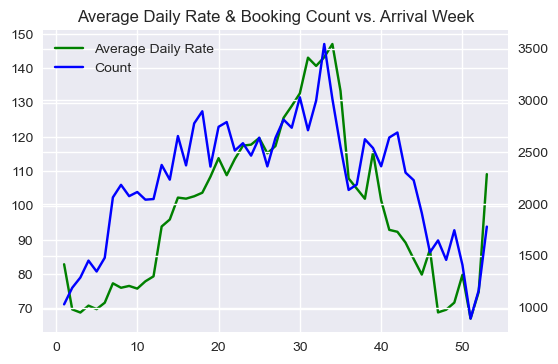

In [14]:
fig = plt.figure(dpi =100)
ax = fig.add_subplot(1,1,1)
ax.plot(wk_adr['arrival_date_week_number'], wk_adr['mean'],color="g", label = 'Average Daily Rate')
ax2 = ax.twinx()
ax2.plot(wk_adr['arrival_date_week_number'], wk_adr['count'],color='b', label = 'Count')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)
plt.title('Average Daily Rate & Booking Count vs. Arrival Week')

<h2>Hotel Type: Resort Hotel vs. City Hotel</h2>
    <li>Resort hotel reservations are slightly less likely to be canceled compared with city hotel.</li>

Text(0, 0.5, 'Frequency')

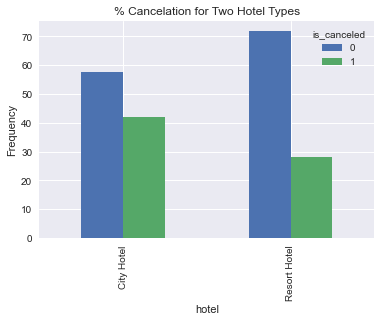

In [15]:
hotel = dfclean.groupby(['hotel', 'is_canceled']).size()
hotel_pct = hotel.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
plot = hotel_pct.unstack().plot(kind='bar')
plot.set_title('% Cancelation for Two Hotel Types')
plot.set_ylabel('Frequency')

<h2>Correlation</h2>
    <li>Check correlation between dataset estimators</li>

In [16]:
#Correlation table between estimators
dfclean.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.290542,0.014097,0.009552,-0.006307,-0.007100,0.018575,0.056952,0.004441,-0.032462,-0.074563,0.110671,-0.054862,-0.144828,-0.082469,0.054126,0.030554,-0.197504,-0.237306
lead_time,0.290542,1.000000,0.038500,0.129324,0.001998,0.079266,0.160173,0.122913,-0.038657,-0.020293,-0.111028,0.087467,-0.069511,0.001377,-0.070954,0.169539,-0.086964,-0.117637,-0.095145
arrival_date_year,0.014097,0.038500,1.000000,-0.539150,-0.000108,0.018889,0.028710,0.042551,0.054631,-0.012415,0.011014,-0.122209,0.028927,0.032159,0.063638,-0.056942,0.195525,-0.016048,0.108024
arrival_date_week_number,0.009552,0.129324,-0.539150,1.000000,0.067455,0.019730,0.017341,0.027906,0.005679,0.009571,-0.032509,0.036142,-0.020711,0.007338,-0.031619,0.022312,0.083721,0.003550,0.027434
arrival_date_day_of_month,-0.006307,0.001998,-0.000108,0.067455,1.000000,-0.016544,-0.029126,0.002168,0.014275,-0.000287,-0.004074,-0.026852,0.001548,0.011266,0.000685,0.021713,0.030478,0.008518,0.003416
stays_in_weekend_nights,-0.007100,0.079266,0.018889,0.019730,-0.016544,1.000000,0.489892,0.104048,0.046028,0.019957,-0.074238,-0.012433,-0.038551,0.048397,0.143376,-0.055824,0.033034,-0.019235,0.075677
stays_in_week_nights,0.018575,0.160173,0.028710,0.017341,-0.029126,0.489892,1.000000,0.105758,0.044199,0.021538,-0.079823,-0.014000,-0.045787,0.078131,0.186672,-0.003960,0.045408,-0.025492,0.071244
adults,0.056952,0.122913,0.042551,0.027906,0.002168,0.104048,0.105758,1.000000,0.035201,0.021047,-0.166206,-0.006742,-0.126192,-0.049963,-0.040395,-0.008779,0.270949,0.017709,0.151605
children,0.004441,-0.038657,0.054631,0.005679,0.014275,0.046028,0.044199,0.035201,1.000000,0.022899,-0.031201,-0.024606,-0.020407,0.051826,0.040974,-0.033457,0.335033,0.056330,0.082020
babies,-0.032462,-0.020293,-0.012415,0.009571,-0.000287,0.019957,0.021538,0.021047,0.022899,1.000000,-0.009452,-0.007471,-0.006654,0.087886,0.036371,-0.010566,0.032300,0.036802,0.096906


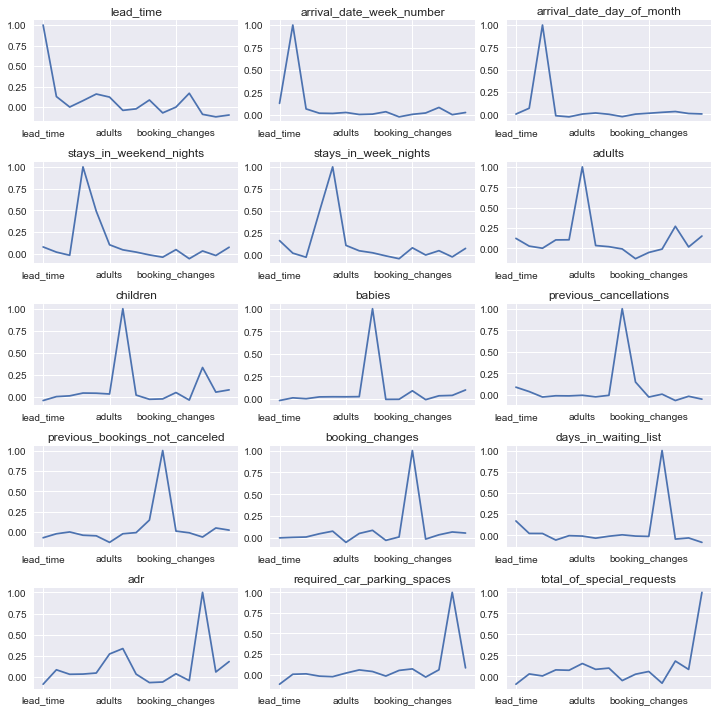

In [17]:
#use line graph to visualize the correlation between selected features
%matplotlib inline
ROW_NUM = 5
COL_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize = (10,10))
for i, col in enumerate(df_num.columns):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    corplt = df_num.corr()[col]
    corplt.plot.line(ax = ax)
    ax.set_title(col)
plt.tight_layout()

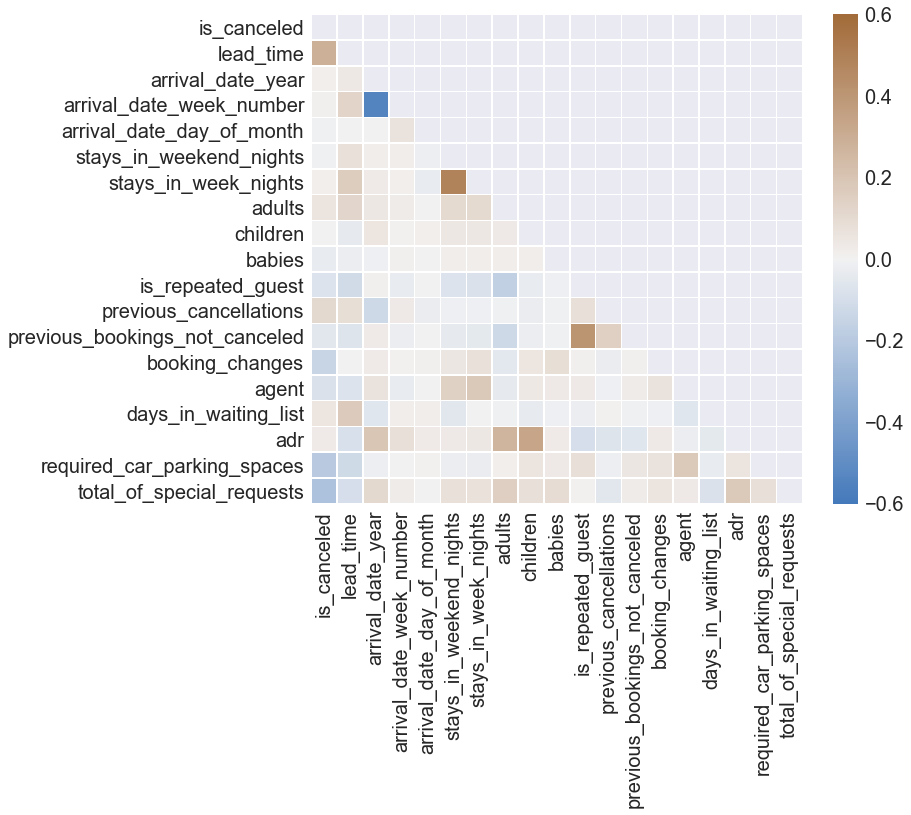

In [18]:
#visualize the correlation table

#set x and y label size
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
corr = dfclean.corr()
fig, ax = plt.subplots(figsize = (11,9)) #change picture resolution and figure size
cor_mask = np.triu(np.ones(corr.shape)).astype(np.bool)

#use heatmap feature to plot the correlation
ax =  sns.heatmap(corr, vmin = -0.6, vmax = 0.6, mask = cor_mask, cmap = sns.diverging_palette(250, 40, as_cmap = True), linewidths = 0.5)

<h2>One Hot Encoding</h2>
    <li>In this dataset, there are around 10 columns with more than one categorical values. </li>
    <li>We use One Hot Encoder to encode the variables for modeling purposes.</li>

In [19]:
#create a copy of dataframe before using one hot encoding for graph comparison purpose
df_room = dfclean.copy()


In [20]:
#change the x and y label size
plt.rc('xtick', labelsize = 5)
plt.rc('ytick', labelsize = 5)

Text(0, 0.5, 'Frequency')

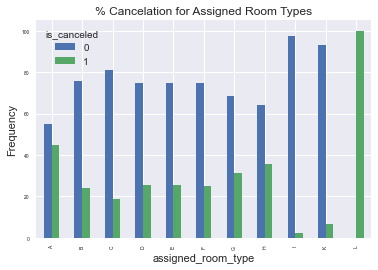

In [21]:
#plot the assigned room type before the one Hot Encoding for comparing purpose
roomtype = df_room.groupby(['assigned_room_type', 'is_canceled']).size()
roomtype_pct = roomtype.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
#plt.rcParams['figure.dpi'] = 200 #change figure resolution
roomtypeplot = roomtype_pct.unstack().plot(kind = 'bar')
roomtypeplot.set_title('% Cancelation for Assigned Room Types')
roomtypeplot.set_ylabel('Frequency')

<li>Perform One Hot Encoding</li>

In [22]:
#Change undefined to SC in meal 
dfclean['meal'].unique()
dfclean.loc[:,'meal'] = dfclean['meal'].replace('Undefined', 'SC')


#Change some categories market_s to ms_Other
dfclean['market_segment'].unique()
replace_feature = ['Aviation', 'Complementary', 'Corporate', 'Undefined']
for rep in replace_feature:
    dfclean.loc[:,'market_segment'] = dfclean['market_segment'].replace(rep, 'Other')
    
    
#Change some categories dis_chan to dc_Other
replace_feature = ['Corporate', 'Undefined', 'GDS']
for rep in replace_feature:
    dfclean.loc[:,'distribution_channel'] = dfclean['distribution_channel'].replace(rep, 'Other')

    
#group re_room type according to cancellation rate 
dfclean['reserved_room_type'].unique()
dfclean.groupby('reserved_room_type').count()
replace_feature = ['B','C','D','L']
for rep in replace_feature:
    dfclean.loc[:,'reserved_room_type'] = dfclean['reserved_room_type'].replace(rep, 'BCDL')
replace_feature = ['A','G','H']
for rep in replace_feature:
    dfclean.loc[:,'reserved_room_type'] = dfclean['reserved_room_type'].replace(rep, 'AGH')
replace_feature = ['E','F']
for rep in replace_feature:
    dfclean.loc[:,'reserved_room_type'] = dfclean['reserved_room_type'].replace(rep, 'EF')
    

#group as_room type according to cancellation rate 
dfclean.groupby('assigned_room_type').count()
replace_feature = ['A','L'] # >40%
for rep in replace_feature:
    dfclean.loc[:,'assigned_room_type'] = dfclean['assigned_room_type'].replace(rep, 'AL')
replace_feature = ['B','D','E','F','G','H'] #20%-40%
for rep in replace_feature:
    dfclean.loc[:,'assigned_room_type'] = dfclean['assigned_room_type'].replace(rep, 'BDEFGH')
replace_feature = ['C','I','K'] # <20%
for rep in replace_feature:
    dfclean.loc[:,'assigned_room_type'] = dfclean['assigned_room_type'].replace(rep, 'CIK')

Text(0, 0.5, 'Frequency')

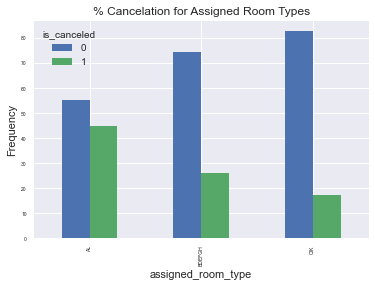

In [23]:
#plot the assigned room type before the one Hot Encoding for comparing purpose
roomtype = dfclean.groupby(['assigned_room_type', 'is_canceled']).size()
roomtype_pct = roomtype.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
#plt.rcParams['figure.dpi'] = 200 #change figure resolution
roomtypeplot = roomtype_pct.unstack().plot(kind = 'bar')
roomtypeplot.set_title('% Cancelation for Assigned Room Types')
roomtypeplot.set_ylabel('Frequency')

<h2>Label Encoder and Combine</h2>

In [24]:
#change variable into numerical
dfmodel = pd.DataFrame()
dfmodel['is_canceled'] = dfclean['is_canceled']
dfmodel['hotel'] = np.where(dfclean['hotel'] == 'Resort Hotel', 1, 0)
dfmodel['lead_time']= dfclean['lead_time']
dfmodel['stays_in_weekend_nights'] = dfclean['stays_in_weekend_nights']
dfmodel['stays_in_week_nights']=dfclean['stays_in_week_nights']
dfmodel['adults']= dfclean['adults']
dfmodel['children']= dfclean['children']
dfmodel['babies']= dfclean['babies']
dfmodel['country'] = np.where(dfclean['country'] == 'USA', 1, 0)
dfmodel['is_repeated_guest']= dfclean['is_repeated_guest']
dfmodel['previous_cancellations']= dfclean['previous_cancellations']
dfmodel['previous_bookings_not_canceled']= dfclean['previous_bookings_not_canceled']
dfmodel['booking_changes']= dfclean['booking_changes']
dfmodel['agent'] = np.where(dfclean['agent'].notnull(), 1, 0)
dfmodel['days_in_waiting_list'] = dfclean['days_in_waiting_list']
dfmodel['adr'] = dfclean['adr']
dfmodel['required_car_parking_spaces'] = dfclean['required_car_parking_spaces']
dfmodel['total_of_special_requests'] = dfclean['total_of_special_requests']
dfmodel['company_category'] = np.where(dfclean['company_category'] == 'Company', 1, 0)
dfmodel['room_type_adjustment'] = np.where(dfclean['room_type_adjustment'] == 'Change', 1, 0)

In [25]:
# function for creating dummy variables
def encode_and_bind(df, dfmodel, feature):
    dummies = pd.get_dummies(df[[feature]])
    res = pd.concat([dfmodel,dummies],axis = 1)
    return(res)

encoder_feature = ['meal','market_segment','distribution_channel','reserved_room_type',
                   'assigned_room_type','deposit_type','customer_type']

#change categorical variable into dummy variables
for feature in encoder_feature:
    dfmodel = encode_and_bind(dfclean, dfmodel, feature)
dfmodel

,is_canceled,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,company_category,room_type_adjustment,meal_BB,meal_FB,meal_HB,meal_SC,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Other,distribution_channel_Direct,distribution_channel_Other,distribution_channel_TA/TO,reserved_room_type_AGH,reserved_room_type_BCDL,reserved_room_type_EF,assigned_room_type_AL,assigned_room_type_BDEFGH,assigned_room_type_CIK,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
2,0,1,7,0,1,1,0.0,0,0,0,0,0,0,0,0,75.00,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
3,0,1,13,0,1,1,0.0,0,0,0,0,0,0,1,0,75.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,0,1,14,0,2,2,0.0,0,0,0,0,0,0,1,0,98.00,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
5,0,1,14,0,2,2,0.0,0,0,0,0,0,0,1,0,98.00,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
6,0,1,0,0,2,2,0.0,0,0,0,0,0,0,0,0,107.00,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,5,2,0.0,0,0,0,0,0,0,1,0,96.14,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
119386,0,0,102,2,5,3,0.0,0,0,0,0,0,0,1,0,225.43,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
119387,0,0,34,2,5,2,0.0,0,0,0,0,0,0,1,0,157.71,0,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0
119388,0,0,109,2,5,2,0.0,0,0,0,0,0,0,1,0,104.40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0


In [26]:
dfmodel = dfmodel.dropna()
dfmodel

,is_canceled,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,company_category,room_type_adjustment,meal_BB,meal_FB,meal_HB,meal_SC,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Other,distribution_channel_Direct,distribution_channel_Other,distribution_channel_TA/TO,reserved_room_type_AGH,reserved_room_type_BCDL,reserved_room_type_EF,assigned_room_type_AL,assigned_room_type_BDEFGH,assigned_room_type_CIK,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
2,0,1,7,0,1,1,0.0,0,0,0,0,0,0,0,0,75.00,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
3,0,1,13,0,1,1,0.0,0,0,0,0,0,0,1,0,75.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,0,1,14,0,2,2,0.0,0,0,0,0,0,0,1,0,98.00,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
5,0,1,14,0,2,2,0.0,0,0,0,0,0,0,1,0,98.00,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
6,0,1,0,0,2,2,0.0,0,0,0,0,0,0,0,0,107.00,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,5,2,0.0,0,0,0,0,0,0,1,0,96.14,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
119386,0,0,102,2,5,3,0.0,0,0,0,0,0,0,1,0,225.43,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
119387,0,0,34,2,5,2,0.0,0,0,0,0,0,0,1,0,157.71,0,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0
119388,0,0,109,2,5,2,0.0,0,0,0,0,0,0,1,0,104.40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0


<h1>Modeling</h1>

In [27]:
#separate our data frame for machine learning models' training and testing purpose 
#70% of the data is used for training and 30% of the data is used for test
from sklearn.model_selection import train_test_split
train, test = train_test_split(dfmodel, test_size = 0.3)
x_train = train.loc[:,train.columns != 'is_canceled']
y_train = train[['is_canceled']]
x_test = test.loc[:,test.columns != 'is_canceled']
y_test = test[['is_canceled']]

<h2>Logistic Regression Model</h2>

In [28]:
from sklearn import linear_model
#Set the logistic regression max_iter to 10000 to avoid the fail to converge issue
logit_model = linear_model.LogisticRegression(max_iter = 10000)
logit_model.fit(x_train,np.ravel(y_train))

logit_pred  = logit_model.predict(x_test)
logit_report = classification_report(y_test, logit_pred)
print('report: Logistic Regression', logit_report, sep='\n')

report: Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.92      0.86     22078
           1       0.83      0.62      0.71     13150

    accuracy                           0.81     35228
   macro avg       0.82      0.77      0.78     35228
weighted avg       0.81      0.81      0.80     35228



<h2>Decision Tree</h2>

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#use for loop to find out which is the best max_depth for the model
for i in range(11):
    if i == 0:
        continue
    tree_model = tree.DecisionTreeClassifier(max_depth = i*2,criterion='entropy')

    tree_model.fit(x_train,y_train)

    tree_pred = tree_model.predict(x_test)
    tree_report = classification_report(y_test, tree_pred)
    print('Decision Tree Report:', tree_report, sep='\n')

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     22078
           1       0.99      0.32      0.49     13150

    accuracy                           0.75     35228
   macro avg       0.85      0.66      0.66     35228
weighted avg       0.82      0.75      0.70     35228

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     22078
           1       1.00      0.32      0.49     13150

    accuracy                           0.75     35228
   macro avg       0.86      0.66      0.66     35228
weighted avg       0.82      0.75      0.70     35228

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     22078
           1       1.00      0.37      0.54     13150

    accuracy                           0.76     35228
   macro avg       0.86      0.69      0.69     35228
weighted

In [30]:
#Based on the f-score, we can find the local max reached when max_depth = 18
#So we select max_depth = 18 for future step
tree_model = tree.DecisionTreeClassifier(max_depth = 18,criterion='entropy')
tree_model.fit(x_train,y_train)
tree_pred = tree_model.predict(x_test)
tree_report = classification_report(y_test, tree_pred)
print('Decision Tree Report:', tree_report, sep='\n')

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86     22078
           1       0.81      0.69      0.74     13150

    accuracy                           0.82     35228
   macro avg       0.82      0.80      0.80     35228
weighted avg       0.82      0.82      0.82     35228



In [31]:
# #plot the decision Tree
# import pydotplus 
# from IPython.display import Image

# dot_data = tree.export_graphviz(tree_model, out_file=None,feature_names=feature_names) 

# graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

# Image(graph.create_png())

<h2>RandomForest</h2>
<li>The GridSearchCV might take more than 30 minutes to run to get the best parameter for the random forest model.</li>

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#set plausible
parameters = {
    'n_estimators': (10,30,40,50),
    'max_depth': (4,6,8,10,15,18,20,22),
    'min_samples_split':(2,4,8,10),
    'min_samples_leaf':(4,8,12,16,18)
}

rfmodel = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
rfmodel.fit(x_train, np.ravel(y_train))
rfmodel.best_score_,rfmodel.best_params_

(0.8403853826693197,
 {'max_depth': 22,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 40})

In [33]:
#based on the GridSearch result, we plug in the parameter values for our random forest model
b_model = RandomForestClassifier(max_depth=22,min_samples_leaf=4,min_samples_split=8,n_estimators=40)
b_model.fit(x_train,np.ravel(y_train))

RandomForestClassifier(max_depth=22, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=40)

In [34]:
#print our the random forest report
rf_pred = rfmodel.predict(x_test)
rf_report = classification_report(y_test, rf_pred)
print('Ranfom Forest Report:', rf_report, sep='\n')

Ranfom Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     22078
           1       0.86      0.68      0.76     13150

    accuracy                           0.84     35228
   macro avg       0.85      0.81      0.82     35228
weighted avg       0.84      0.84      0.84     35228



Text(0.5, 0, 'Relative Importance')

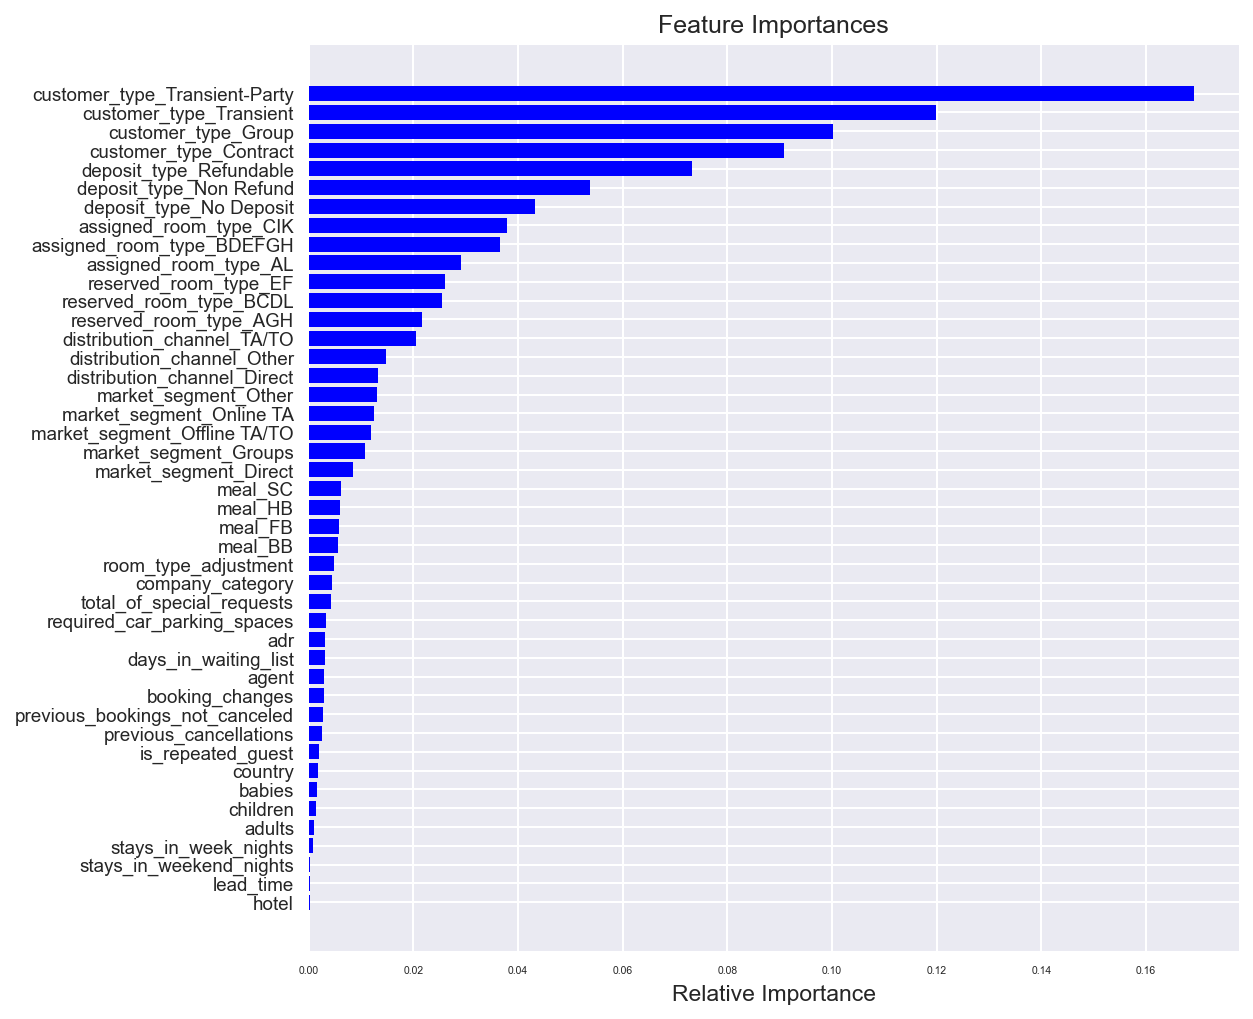

In [35]:
#visualize the feature importance in the random forest model
import matplotlib.pyplot as plt
%matplotlib inline
importances = b_model.feature_importances_
feature_names = [key for key in dfmodel if not key == 'is_canceled']
indices = np.argsort(importances)
plt.rc('ytick', labelsize=9)
plt.figure(figsize=(8,8),dpi=150)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')

<h2>Model Comparison</h2>
<li>Compare three models' ROC Graph</li>
<li>From the random forest model, we obtain an excellent auc score, which is 0.912. </li>

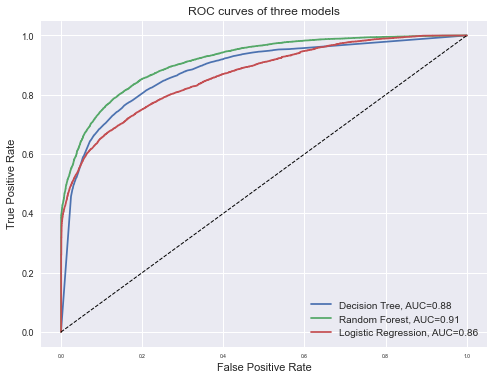

In [36]:
# ROC curve of three models
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

f, ax = plt.subplots(figsize=(8, 6))
tree_probs = tree_model.predict_proba(x_test)[:,1]
tree_fpr, tree_tpr, _ = metrics.roc_curve(y_test,tree_probs,pos_label=1)
tree_auc = roc_auc_score(y_test, tree_probs)
plt.plot(tree_fpr, tree_tpr, label='Decision Tree, AUC='+str(round(tree_auc,2)))

rf_probs = b_model.predict_proba(x_test)[:,1]
rf_fpr, rf_tpr, _ = metrics.roc_curve(y_test,rf_probs,pos_label=1)
rf_auc = roc_auc_score(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, label='Random Forest, AUC='+str(round(rf_auc,2)))

logit_probs = logit_model.predict_proba(x_test)[:,1]
logit_fpr, logit_tpr, logit_thre = metrics.roc_curve(y_test,logit_probs,pos_label=1)
logit_auc = roc_auc_score(y_test, logit_probs)
plt.plot(logit_fpr, logit_tpr, label='Logistic Regression, AUC='+str(round(logit_auc,2)))

plt.plot([0, 1], [0, 1], linestyle='--', color='black', linewidth=1) 

#axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#show the legend
plt.legend()

#set title
plt.title("ROC curves of three models")
plt.show()

In [37]:
print(tree_auc, rf_auc, logit_auc)

0.8809378604787658 0.9143255660797511 0.8640072459999235
